# Lab 03

## Statistical power of the test


Let's consider the following example.

The taxi company claims that the average wait time for a taxi is 7 minutes with standard deviation 3.
Their competitor made an independent experiment with 100 participants and discovered that the averate wait time of the experiment was 14. 

Can the competitor company claim that they have an evidence that the average wait time is bigger than the reported one?

In [2]:
from plotly import __version__
from plotly.offline import init_notebook_mode, plot, iplot
import numpy as np 
from scipy.stats import norm

init_notebook_mode(connected=True) # inline mode for plotly

h0_mean = 7 # H0 hypothesis
sigma = 3 # we suppose that we know sigma
n = 100 # sample size
start = 6; end = 10 # start and end of the considered values of mean
sigma_ztest = sigma/np.sqrt(n) # standard deviation of the distribution of means
sign_level_arg = norm.ppf(.95, h0_mean, sigma_ztest) # the critical value for the significance level 0.05
x1 = np.append(np.arange(start, sign_level_arg, 0.05), [sign_level_arg]) # x argument for the uncolored part of plot
x2 = np.arange(sign_level_arg, end, 0.05) # x argument for colored part
step_range = np.arange(h0_mean,end,0.1)

# creating scatterplot for each of the steps (in slider)
data = [dict(visible = False, line=dict(color='00CED1', width=6), hoverinfo='none',
            x = x1, y = norm.pdf(x1,step,sigma_ztest), name = 'True') for step in step_range] + [
        dict(visible = False, line=dict(color='00CED1', width=6), hoverinfo='none', 
             fill='tozeroy', showlegend=False,
            x = x2, y = norm.pdf(x2,step,sigma_ztest), name='') for step in step_range]+ [
        dict(visible = True, line=dict(color='red', width=6), hoverinfo='none',
            x = x1, y = norm.pdf(x1,h0_mean,sigma_ztest), name='H0'),
        dict(visible = True, line=dict(color='red', width=6), hoverinfo='none',
            fill='tozeroy',showlegend=False,
            x = x2, y = norm.pdf(x2,h0_mean,sigma_ztest), name = '')]

# number of steps
size = (len(data)-2)
# step 10 is visible
data[10]['visible'] = True
data[10+np.int(size/2)]['visible'] = True

steps = []

for i in range(0, np.int(size/2)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * (len(data)-2) + [True]*2],
        label = ['%.2f'%t for t in step_range][i]
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i+np.int(size/2)] = True 
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "True mean: "},
    pad = {"t": 50},
    steps = steps
)]
layout = dict(sliders=sliders, annotations=[
        dict(x=1,y=0.01,xref='x',yref='y', text='alpha',showarrow=True,arrowhead=5,ax=-40,ay=-40)
    ], xaxis=dict(range=[start,end]))

fig = dict(data=data, layout=layout)

iplot(fig, filename='Sine Wave Slider')

### Exercise 1

For the example above plot the power function of the z-test with significance level = 0.05.
(Using `matplotlib` not `plotly`) Take the range of x from 7.0 to 10.0.

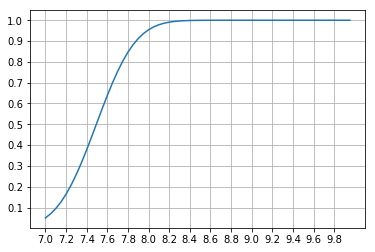

In [3]:
# your solution here
import matplotlib.pyplot as plt
M_x = np.arange(7,10,.05)
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(M_x[M_x%.2>.15])
ax.set_yticks(np.linspace(0,1,11))
plt.plot(M_x, norm.sf(sign_level_arg, loc=M_x, scale=sigma_ztest))
plt.grid()
plt.show()

## Paired vs non-paired test
- Independent samples

The non-paired t-test is applicable when the samples are independent i.e. they are drawn from *different* populations. The test can check whether the means of two distributions are the same.

The standard deviation of the difference between independent sample means is computed using the standard deviations of the means of each sample, i.e. $\sigma_{\bar{x}_{1,2}} = \sqrt{\sigma_{\bar{x}_1}+\sigma_{\bar{x}_2}} = \sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}$ , where $n_1$ and $n_2$ are sample sizes.

Then the $t$-statistics is calculated as following:
$$
t=\frac{\mu_1-\mu_2}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}
$$
The number of degrees of freedom:

$df = (n_1-1) + (n_2-1)= n_1+n_2-2$


- Dependent samples

The paired t-test is applied when the samples are dependent i.e. the variable under the test is the *difference* between 2 samples. These samples can be repeated measures taken on the same subjects. For example, two math tests on the students of the same class.

$$t=\frac{\mu_{delta}}{\frac{\sigma^2}{n}}$$

The number of degrees of freedom equals to the number of pairs minus 1.
$df = n-1$


### Statistical test of authorship
In 1861 10 letters were published in the New Orleans Daily Crescent signed "Quintus Curtius Snodgrass". There was a hypothesis that they were written by Mark Twain. 

In 1963 American Statistical Association Journal published a study exploring the authorship of those letters.
The researchers applied 3 types of methods: visual exploration, $\chi^2$ test of goodness and two-sampled $t$-test. Let's consider the latter. 

The tests were limited to 2,3, or 4 letter words (about 60% of the total).
There were 2 samples: controls (from real Mark Twain's essays) and studies (from 10 letters of Quintus Curtius Snodgrass - QCS).
For each of 2 samples 3 variables were measured: the frequencies of 2,3, and 4 letter words.

### Exercise 2
Test whether there is enough evidence to claim that the 10 letters author is not Mark Twain.

Perform 2 sampled t-test and draw conclusions.

1. Read csv from data/qcs.csv (with `pandas` or without). The controls has type column equal to 1, studies (QCS samples) - 0.
1. Perform 3 tests (for each variable measured).
1. Draw conclusions (as a text cell or in comments).

In [14]:
# read the data
import pandas as pd
data = pd.read_csv('data/qcs.csv')
controls=data[data['type']==1]
studies=data[data['type']==0]

In [106]:
# perform 3 tests
from scipy.stats import t
def indep_t(series1, series2):
    n_1 = series1.size
    n_2 = series2.size
    m_tw_1 = series1.mean()
    m_tw_2 = series2.mean()
    std_tw_1 = series1.std()
    std_tw_2 = series2.std()
    df = (std_tw_1**2/n_1 + std_tw_2**2/n_2)**2/((std_tw_1**2/n_1)**2/(n_1-1) + (std_tw_2**2/n_2)**2/(n_2-1))
    t_stat = abs((m_tw_1 - m_tw_2)/(std_tw_1**2/n_1 + std_tw_2**2/n_2)**.5)
    p = 2*(t.cdf(-t_stat, df))
    return p


def authorship_test(controls, studies):
    p1 = indep_t(controls['2-letter'], studies['2-letter'])
    p2 = indep_t(controls['3-letter'], studies['3-letter'])
    p3 = indep_t(controls['4-letter'], studies['4-letter'])
    print('p-value for 2-letter words = %f' %p1)
    print('p-value for 3-letter words = %f' %p2)
    print('p-value for 4-letter words = %f' %p3)


In [107]:
authorship_test(controls, studies)

p-value for 2-letter words = 0.031765
p-value for 3-letter words = 0.003156
p-value for 4-letter words = 0.016230


# make conclusions
Two-sampled t-test shows that the probability of letters' by QCS belonging to Mark Twain judging by 2- to 4-letter words is no greater than 3%. The difference between frequencies of usages of the words is too large to be produced by sample from the same population.

### Arachnophobia invesigation

Twelve participants were a part of arachnophobia (fear of spiders) research. Their level of anxiety was measured 2 times: 1) when they were exposed to the picture of the spider and 2) to the real spider.

The researcher hypothesis was that the real spider will cause more anxiety than the picture. Perform a t-test to check whether we can prove hypothesis with the given data.

### Exercise 3
1. Read the data from 'data/arachn.csv'
2. Perform a t-test to test whether real spider causes more anxiety than the picture.
3. Report t-statistics and p-value

In [97]:
# your solution here
data_a = pd.read_csv('data/arachn.csv')
real = data_a[['id', 'real']]
picture = data_a[['id', 'picture']]

In [104]:
def dep_t(series1, series2):
    n = series1.size
    delta_mean = abs((series1 - series2).mean())
    delta_std = (series1 - series2).std()
    t_stat = delta_mean*n/delta_std**2
    p = 2*(t.cdf(-t_stat, n-1))
    return p

def arachn_test(real, picture):
    p = dep_t(real['real'], picture['picture'])
    print('p-value = %f' %p)

In [105]:
arachn_test(real, picture)

p-value = 0.401138


In this case, the distribution of mean difference between two shock values according to t-test demonstrates high probability of values' from both samples being produced by the same population which provides evidence against the hypothesis H1 proposed by the researcher.